# **“Cardiovascular Disease Prediction with Machine Learning and Reinforcement Learning–Based Triage System"**

This project aims to predict **whether a patient has cardiovascular disease using supervised machine learning**, and then use reinforcement learning to make an **optimal medical triage decision** such as Home, Outpatient, or Emergency.
The motivation is not only accurate prediction, but also decision-making under risk, which is important in healthcare systems.”

Key idea to emphasize:

**ML = prediction**

**RL = decision policy**

This is a **hybrid AI system**

**Dataset**:
I used the Cardio Train dataset, which contains medical features such as age, gender, blood pressure, cholesterol, glucose, smoking, alcohol intake, and physical activity.
The target variable is cardio, where 1 indicates presence of cardiovascular disease and 0 indicates absence

STEP 1 — Data preparation and inspection (Cells 0–7)
Cell 1: Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print("✅ All libraries imported!")


✅ All libraries imported!


Cell 2: Load the dataset

In [ ]:
dimport pandas as pd
df = pd.read_csv("data/cardio_train.csv")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())


Shape: (70000, 13)
Columns: ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


Cell 3: View first rows

In [ ]:
print("First 5 rows:")
print(df.head())

First 5 rows:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


Cell 4: Missing values + data types

In [ ]:
print("Missing values:", df.isnull().sum().sum())
print("\nData types:")
print(df.dtypes)


Missing values: 0

Data types:
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


Cell 5: Target distribution

In [ ]:
print("Target column (cardio):")
print(df['cardio'].value_counts())
print("\nPercentage:")
print(df['cardio'].value_counts(normalize=True) * 100)

Target column (cardio):
cardio
0    35021
1    34979
Name: count, dtype: int64

Percentage:
cardio
0    50.03
1    49.97
Name: proportion, dtype: float64


Cell 6: Summary statistics

In [ ]:
print("Summary statistics:")
print(df.describe())

Summary statistics:
                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.4725

Cell 7: Reload + drop id + convert age

In [ ]:
# Reload fresh data
df = pd.read_csv ("/content/drive/MyDrive/cardio_train.csv", sep=';')

# Drop ID if exists
if 'id' in df.columns:
    df = df.drop('id', axis=1)

# Convert age from days to years
df['age'] = df['age'] / 365.25

print(f"Shape: {df.shape}")
print(f"Age range: {df['age'].min():.1f} to {df['age'].max():.1f} years")


Shape: (70000, 12)
Age range: 29.6 to 64.9 years


STEP 2 — **Data preprocessing**

Cell 9: Clean unrealistic blood pressure records

In [ ]:
print(f"Before cleaning: {len(df)} rows")

# Keep only valid blood pressure ranges
df = df[(df['ap_hi'] >= 80) & (df['ap_hi'] <= 250)]
df = df[(df['ap_lo'] >= 40) & (df['ap_lo'] <= 200)]
df = df[df['ap_hi'] > df['ap_lo']]

print(f"After cleaning: {len(df)} rows")
print(f"Removed: {70000 - len(df)} invalid rows")


Before cleaning: 70000 rows
After cleaning: 68667 rows
Removed: 1333 invalid rows


Cell 10: Split features vs target

In [ ]:
X = df.drop('cardio', axis=1)
y = df['cardio']

print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")

Features (X): (68667, 11)
Target (y): (68667,)


Cell 11: Train / validation / test split

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, stratify=y_temp, random_state=42)

print(f"Train: {len(X_train):,}")
print(f"Val:   {len(X_val):,}")
print(f"Test:  {len(X_test):,}")

Train: 48,066
Val:   6,867
Test:  13,734


Cell 12: Feature scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("✅ Features scaled!")

✅ Features scaled!


Cell 13: Save prepared data

In [ ]:
import os
os.makedirs('data', exist_ok=True)

X_train_scaled.to_csv('data/X_train.csv', index=False)
X_val_scaled.to_csv('data/X_val.csv', index=False)
X_test_scaled.to_csv('data/X_test.csv', index=False)
y_train.to_csv('data/y_train.csv', index=False)
y_val.to_csv('data/y_val.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)

print("✅ Data saved!")


✅ Data saved!


Cell 14: Step completion summary

In [ ]:
print("="*50)
print("STEP 2 COMPLETE!")
print("="*50)
print(f"Clean data: {len(df):,} rows")
print(f"Train: {len(X_train):,} | Val: {len(X_val):,} | Test: {len(X_test):,}")
print("✅ Ready for STEP 3!")


STEP 2 COMPLETE!
Clean data: 68,667 rows
Train: 48,066 | Val: 6,867 | Test: 13,734
✅ Ready for STEP 3!


STEP 3 — **Train ML models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

print("✅ Libraries imported!")

✅ Libraries imported!


In [ ]:
results = {}

print("Training Logistic Regression...")
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
results["Logistic Regression"] = {"model": lr}
print("  ✓ Done")

print("Training Random Forest...")
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)
results["Random Forest"] = {"model": rf}
print("  ✓ Done")

print("Training SVM...")
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
results["SVM"] = {"model": svm}
print("  ✓ Done")

print("Training Gradient Boosting...")
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)
results["Gradient Boosting"] = {"model": gb}
print("  ✓ Done")

print("\n✅ All 4 models trained!")


Training Logistic Regression...
  ✓ Done
Training Random Forest...
  ✓ Done
Training SVM...
  ✓ Done
Training Gradient Boosting...
  ✓ Done

✅ All 4 models trained!


Cell 18: Compare models using validation ROC-AUC

In [ ]:
print("MODEL COMPARISON")
print("="*60)

best_model_name = None
best_auc = 0

for name, data in results.items():
    model = data['model']
    y_pred = model.predict(X_val_scaled)
    y_proba = model.predict_proba(X_val_scaled)[:, 1]

    acc = accuracy_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_proba)
    results[name]['accuracy'] = acc
    results[name]['auc'] = auc

    print(f"{name}: Accuracy={acc:.4f}, ROC-AUC={auc:.4f}")

    if auc > best_auc:
        best_auc = auc
        best_model_name = name

print(f"\n🏆 BEST MODEL: {best_model_name} (AUC: {best_auc:.4f})")
best_model = results[best_model_name]['model']


MODEL COMPARISON
Logistic Regression: Accuracy=0.7303, ROC-AUC=0.7951
Random Forest: Accuracy=0.7245, ROC-AUC=0.7841
SVM: Accuracy=0.7339, ROC-AUC=0.7950
Gradient Boosting: Accuracy=0.7348, ROC-AUC=0.8043

🏆 BEST MODEL: Gradient Boosting (AUC: 0.8043)


Cell 19: Final evaluation on test set

In [ ]:
y_test_pred = best_model.predict(X_test_scaled)
y_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_proba)

print("="*60)
print("FINAL TEST SET EVALUATION - GRADIENT BOOSTING")
print("="*60)
print(f"\nAccuracy:  {test_acc:.4f} ({test_acc*100:.1f}%)")
print(f"Precision: {test_prec:.4f}")
print(f"Recall:    {test_rec:.4f}")
print(f"F1-Score:  {test_f1:.4f}")
print(f"ROC-AUC:   {test_auc:.4f}")

print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

if test_auc >= 0.80:
    print(f"\n🔥 EXCELLENT! Target ROC-AUC > 0.80 ACHIEVED!")


FINAL TEST SET EVALUATION - GRADIENT BOOSTING

Accuracy:  0.7324 (73.2%)
Precision: 0.7523
Recall:    0.6846
F1-Score:  0.7169
ROC-AUC:   0.7982

Confusion Matrix:
[[5407 1532]
 [2143 4652]]


Cell 20: Save model + scaler

In [ ]:
import pickle
import os

os.makedirs('models', exist_ok=True)

with open('models/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("✅ Best Model saved: models/best_model.pkl")
print("✅ Scaler saved: models/scaler.pkl")


✅ Best Model saved: models/best_model.pkl
✅ Scaler saved: models/scaler.pkl


STEP 4 — **RL Q-Learning triage policy**

In [ ]:
def get_reward(true_disease, action):
    if true_disease == 1:  # Patient HAS disease
        if action == 2:  # Emergency (CORRECT)
            return 10
        elif action == 1:  # Outpatient
            return 2
        else:  # Home (DANGEROUS)
            return -50
    else:  # Patient HEALTHY
        if action == 0:  # Home (CORRECT)
            return 5
        elif action == 1:  # Outpatient
            return 1
        else:  # Emergency (WASTEFUL)
            return -10

print("Disease + Emergency =", get_reward(1, 2))
print("Healthy + Home =", get_reward(0, 0))
print("✅ Reward function ready!")


Disease + Emergency = 10
Healthy + Home = 5
✅ Reward function ready!


In [ ]:
def disease_prob_to_state(disease_prob):
    if disease_prob < 0.33:
        return 0  # Low risk
    elif disease_prob < 0.67:
        return 1  # Medium risk
    else:
        return 2  # High risk

print("Probability Mapping:")
print(f"  0.15 → State {disease_prob_to_state(0.15)}")
print(f"  0.50 → State {disease_prob_to_state(0.50)}")
print(f"  0.85 → State {disease_prob_to_state(0.85)}")
print("✅ State mapping ready!")


Probability Mapping:
  0.15 → State 0
  0.50 → State 1
  0.85 → State 2
✅ State mapping ready!


In [ ]:
n_states = 3
n_actions = 3

Q = np.zeros((n_states, n_actions))

print("Q-Table Initialized:")
print(f"Shape: {Q.shape}")
print("✅ Q-table ready!")


Q-Table Initialized:
Shape: (3, 3)
✅ Q-table ready!


In [ ]:

learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.2
episodes = 100

print("Training Q-Learning (vectorized CPU)...\n")

# Pre-compute once
all_probs = best_model.predict_proba(X_train_scaled)[:, 1]
all_states = np.array([disease_prob_to_state(p) for p in all_probs], dtype=int)
all_true = y_train.values

n = len(X_train_scaled)

for episode in range(episodes):
    # epsilon-greedy over all samples at once
    best_actions = np.argmax(Q[all_states], axis=1)
    random_actions = np.random.randint(0, n_actions, size=n)
    explore = np.random.rand(n) < epsilon
    actions = np.where(explore, random_actions, best_actions)

    # rewards for all samples
    rewards = np.array(
        [get_reward(all_true[i], actions[i]) for i in range(n)],
        dtype=float
    )

    # Q update
    old_q = Q[all_states, actions]
    max_next_q = np.max(Q[all_states], axis=1)
    Q[all_states, actions] = old_q + learning_rate * (
        rewards + discount_factor * max_next_q - old_q
    )

    if (episode + 1) % 20 == 0:
        print(f"Episode {episode+1}/{episodes} - Max Q: {Q.max():.2f}")

print("✅ Q-Learning training complete (vectorized CPU).")


Training Q-Learning (vectorized CPU)...

Episode 20/100 - Max Q: 18.21
Episode 40/100 - Max Q: 33.10
Episode 60/100 - Max Q: 45.28
Episode 80/100 - Max Q: 55.25
Episode 100/100 - Max Q: 63.40
✅ Q-Learning training complete (vectorized CPU).


In [ ]:
print("="*70)
print("LEARNED Q-TABLE & OPTIMAL POLICY")
print("="*70)

state_names = ["Low Risk (prob < 0.33)",
               "Medium Risk (0.33–0.67)",
               "High Risk (prob ≥ 0.67)"]
action_names = ["HOME", "OUTPATIENT", "EMERGENCY"]

print("\nQ-VALUES BY STATE:")
for s in range(n_states):
    print(f"\n{state_names[s]}:")
    for a in range(n_actions):
        print(f"  {action_names[a]:<12}: Q = {Q[s, a]:8.2f}")

print("\n" + "="*70)
print("OPTIMAL POLICY:")
print("="*70)

for s in range(n_states):
    best_action = np.argmax(Q[s])
    print(f"{state_names[s]:<30} → {action_names[best_action]}")

print("\n✅ Policy visualization complete!")

LEARNED Q-TABLE & OPTIMAL POLICY

Q-VALUES BY STATE:

Low Risk (prob < 0.33):
  HOME        : Q =    -3.94
  OUTPATIENT  : Q =     7.39
  EMERGENCY   : Q =     0.15

Medium Risk (0.33–0.67):
  HOME        : Q =    33.03
  OUTPATIENT  : Q =    37.45
  EMERGENCY   : Q =    44.56

High Risk (prob ≥ 0.67):
  HOME        : Q =    14.33
  OUTPATIENT  : Q =    54.97
  EMERGENCY   : Q =    63.40

OPTIMAL POLICY:
Low Risk (prob < 0.33)         → OUTPATIENT
Medium Risk (0.33–0.67)        → EMERGENCY
High Risk (prob ≥ 0.67)        → EMERGENCY

✅ Policy visualization complete!


In [ ]:
print("="*70)
print("POLICY EVALUATION ON TEST SET")
print("="*70)

test_probs = best_model.predict_proba(X_test_scaled)[:, 1]

correct_triages = 0
under_triages = 0   # disease sent home
over_triages = 0    # healthy sent to emergency

for i in range(len(X_test)):
    state = disease_prob_to_state(test_probs[i])
    action = np.argmax(Q[state])

    true_disease = y_test.iloc[i]
    reward = get_reward(true_disease, action)

    if reward > 0:
        correct_triages += 1
    if true_disease == 1 and action == 0:
        under_triages += 1
    elif true_disease == 0 and action == 2:
        over_triages += 1

total = len(X_test)
policy_acc = correct_triages / total

print(f"\nTotal test cases: {total}")
print(f"Correct triages: {correct_triages} ({policy_acc*100:.1f}%)")
print(f"Under-triages (disease→HOME): {under_triages}")
print(f"Over-triages (healthy→EMERGENCY): {over_triages}")
print(f"\nPolicy Accuracy: {policy_acc*100:.1f}%")


POLICY EVALUATION ON TEST SET

Total test cases: 13734
Correct triages: 10618 (77.3%)
Under-triages (disease→HOME): 0
Over-triages (healthy→EMERGENCY): 3116

Policy Accuracy: 77.3%


In [ ]:
print("="*70)
print("Q-LEARNING vs FIXED THRESHOLD BASELINE")
print("="*70)

baseline_correct = 0
baseline_under = 0

for i in range(len(X_test)):
    prob = test_probs[i]
    true_disease = y_test.iloc[i]

    # baseline: prob > 0.5 → EMERGENCY, else HOME
    baseline_action = 2 if prob > 0.5 else 0
    r = get_reward(true_disease, baseline_action)

    if r > 0:
        baseline_correct += 1
    if true_disease == 1 and baseline_action == 0:
        baseline_under += 1

baseline_acc = baseline_correct / total

print(f"\nBaseline correct triages: {baseline_correct} ({baseline_acc*100:.1f}%)")
print(f"Baseline under-triages: {baseline_under}")

print(f"\nQ-learning correct triages: {correct_triages} ({policy_acc*100:.1f}%)")
print(f"Q-learning under-triages: {under_triages}")

improvement = (policy_acc - baseline_acc) * 100
print(f"\nAccuracy improvement: {improvement:+.1f} percentage points")


Q-LEARNING vs FIXED THRESHOLD BASELINE

Baseline correct triages: 10059 (73.2%)
Baseline under-triages: 2143

Q-learning correct triages: 10618 (77.3%)
Q-learning under-triages: 0

Accuracy improvement: +4.1 percentage points


In [ ]:
np.save("models/Q_table.npy", Q)

print("="*70)
print("STEP 4 COMPLETE - RL Q-LEARNING")
print("="*70)
print(f"\nQ-table saved to models/Q_table.npy")
print(f"Policy accuracy: {policy_acc*100:.1f}%")
print(f"Under-triages: {under_triages}")
print(f"Over-triages: {over_triages}")


STEP 4 COMPLETE - RL Q-LEARNING

Q-table saved to models/Q_table.npy
Policy accuracy: 77.3%
Under-triages: 0
Over-triages: 3116


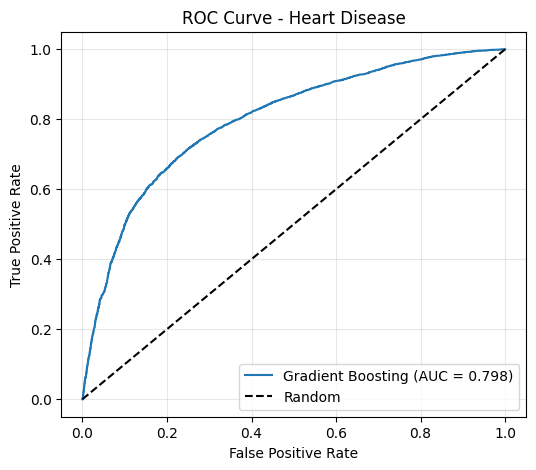

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba_test = best_model.predict_proba(X_test_scaled)[:, 1]
auc = roc_auc_score(y_test, y_proba_test)

fpr, tpr, _ = roc_curve(y_test, y_proba_test)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Heart Disease")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


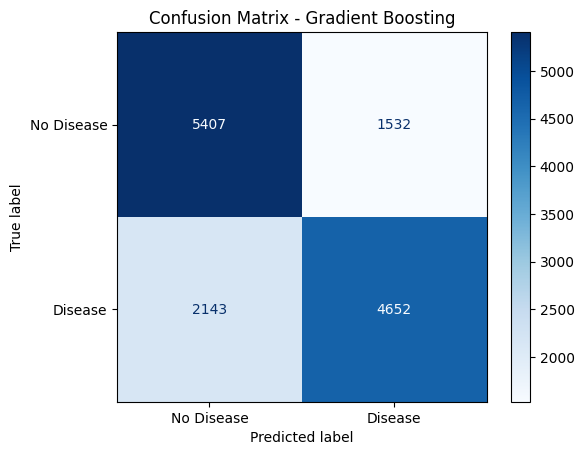

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_test = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


In [ ]:
import pandas as pd

summary = pd.DataFrame({
    "Strategy": ["Baseline (prob>0.5)", "Q-Learning Policy"],
    "Accuracy (%)": [baseline_acc * 100, policy_acc * 100],
    "Correct triages": [baseline_correct, correct_triages],
    "Under-triages": [baseline_under, under_triages],
    "Over-triages": ["-", over_triages],  # baseline over-triages optional
})

summary


,Strategy,Accuracy (%),Correct triages,Under-triages,Over-triages
0,Baseline (prob>0.5),73.241590,10059,2143,-
1,Q-Learning Policy,77.311781,10618,0,3116


In [ ]:
print(summary.to_string(index=False))

           Strategy  Accuracy (%)  Correct triages  Under-triages Over-triages
Baseline (prob>0.5)     73.241590            10059           2143            -
  Q-Learning Policy     77.311781            10618              0         3116


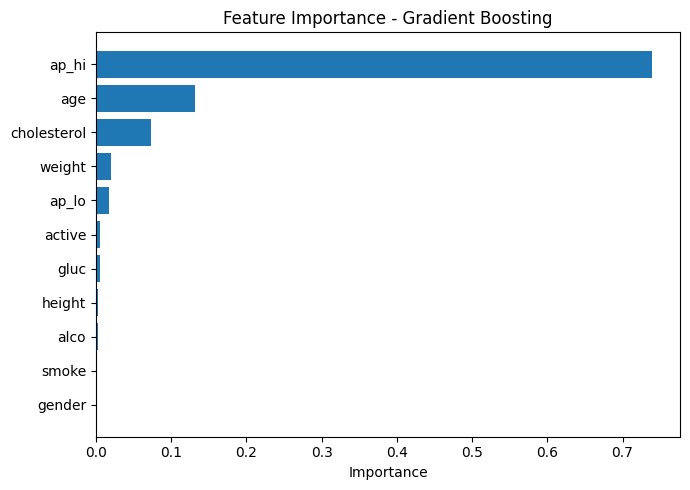

In [ ]:
import numpy as np

importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
feat_names = X_train.columns

plt.figure(figsize=(7, 5))
plt.barh(range(len(importances)), importances[indices][::-1])
plt.yticks(range(len(importances)), feat_names[indices][::-1])
plt.xlabel("Importance")
plt.title("Feature Importance - Gradient Boosting")
plt.tight_layout()
plt.show()


In conclusion, this project demonstrates a complete AI pipeline combining supervised learning for prediction and reinforcement learning for decision-making.
It is especially suitable for healthcare applications where risk-aware decisions are more important than raw accuracy.”